In [18]:
from qiskit import *

## The Bernstein-Vazirani Algorithm
This algorithm solves the Bernstein-Vazirani problem in a similar fashion to the Deutsch-Jozsa algorithm. Instead of the function being guarunteed to be balanced or constant, it is guarunteed to return the bitwise product of the input $x$ with a string $s$, both of which have length $n$.

$f(x) = s \cdot x~(\text{mod}~2)$

The problem requires finding the string $s$.

The classical solution to this problem requires $n$ calls of the function $f(x)$, by querying the oracle with the $n$ unique inputs that contain a single 1. Each result exposes the value of the correspondingly located bit in $s$.

The quantum solution lets us solve the problem with 100% confidence in just one call.

## Quantum Algorithm

Very similar to Deutsch-Jozsa.

1. Initialise to $\ket{0}^{\otimes n}\ket{-}$
2. Apply Hadamard gates to the input
3. Query oracle
4. Hadamard transform for input register
5. Measure

#### Before Oracle
The Hadamard transform does the following to our prepared input register $x=\ket{00...0}$:

$$\ket{00...0} \rightarrow \frac{1}{\sqrt{2^n}}\sum_{y \in \{0,1\}^n} (-1)^{a \cdot x} \ket{y} = \frac{1}{\sqrt{2^n}}\sum_{y \in \{0,1\}^n}  \ket{y}= \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}  \ket{x}$$

#### The Oracle

The oracle performs a conditional phase flip. A phase flip corresponds to a result of $s \cdot x~\text{mod}~2= 1$.

$$\ket{x} \rightarrow (-1)^{s \cdot x} \ket{x}$$

Applying this after our Hadamard transform we have:

$$ \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} (-1)^{s \cdot x} \ket{x}$$

#### After Oracle

Again we apply the Hadamard transform, which as its own inverse, we can see will give us:

$$ \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} (-1)^{s \cdot x} \ket{x} \rightarrow \ket{s}$$

Measuring the input registers reveals the binary string $s$ used by the oracle with 100% certainty and accuracy.


### Configurable Oracle

In [19]:
import numpy as np

def build_oracle(s:str, n:int):
    # Generates an oracle for s.x mod 2
    s = s[::-1] # reverse to get qiskit qubit ordering
    oracle = QuantumCircuit(n+1,name="Oracle")
    for i,b in enumerate(s):
        if b == "1":
            oracle.cx(i, n)
        else:
            oracle.i(i)
    return oracle

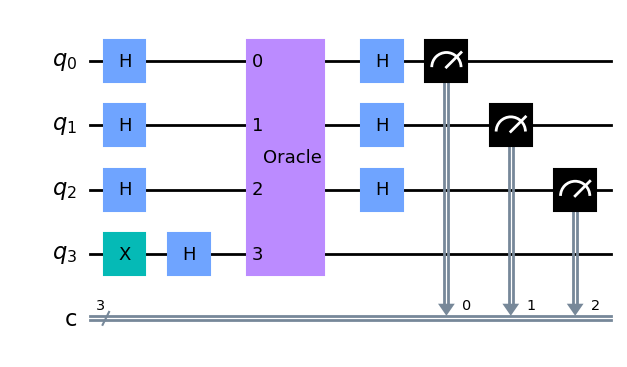

In [20]:
n = int(input("n=...?"))
s = input("What oracle string?")

if len(s) != n:
    raise Exception("n and length of s do not match")


circuit = QuantumCircuit(n+1,n)
# prepare our initial state: |00> to |01> to |+>|->
circuit.x(n) 
circuit.h(range(n+1))

#Choose an oracle
oracle = build_oracle(s=s,n=n).to_instruction()

circuit.append(oracle, range(n+1))

# Hadamard and measure
circuit.h(range(n))
circuit.measure(range(n),range(n))
circuit.draw('mpl')

### Results

We see that we measure the correct bit string with 100% probability on the simulator. Running on real hardware we would measure the correct bit string with high probability.

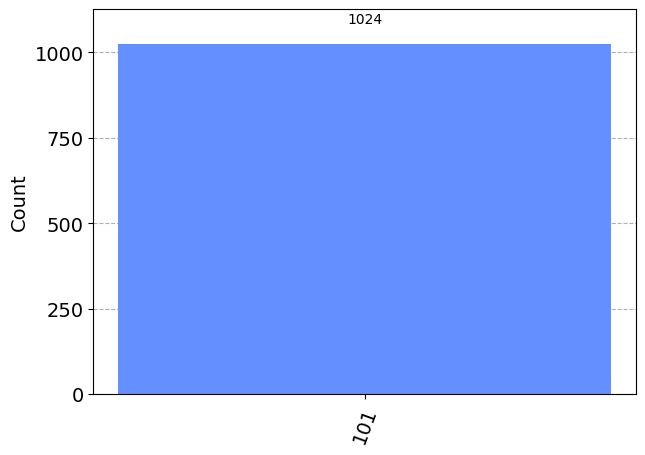

In [21]:
from qiskit.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend))
counts = job.result().get_counts()
plot_histogram(counts)